In [1]:
# from google.colab import drive
# drive.mount("/content/drive")
# DRIVE_SRC = "/content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/backend/experiments/src"
# !rm -r -f ./sample_data
# !cp -r /content/drive/MyDrive/IIT-Projects/third-umpire-decision-automation/.creds/.aws ~/
# !cp -r $DRIVE_SRC ./src

In [2]:
# ! pip install -qq sagemaker

In [3]:
# TODO in the augmented dataset
# 1. Filter out the small bounding boxes
# 2. Split correctly
# 3. There are some images without segmentations

In [4]:
# !rm -r /content/data/cricket-semantic-segmentation

In [5]:
import sys, os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

# import os, shutil
# from src.data.download import download
# from src.data.generate import segmentationDS2DetectionDS

# # download_dir = download("cricket-semantic")
download_dir = "../data/Cricket-Semantic-Segmentation-batsmens-copy"
# segmentationDS2DetectionDS(download_dir)
# seg_dir = f"{download_dir}/segmentation-images"
# os.makedirs(seg_dir)
# src_img_dir = f"{download_dir}/images"
# src_seg_names = list(filter(lambda nm: "___fuse" in nm, os.listdir(src_img_dir)))
# for src_seg_name in src_seg_names:
#     dst_seg_name = src_seg_name[:-11]
#     src_seg_path = f"{src_img_dir}/{src_seg_name}"
#     dst_seg_path = f"{seg_dir}/{dst_seg_name}"
#     shutil.move(src_seg_path, dst_seg_path)

# imp_fil_names = list(filter(lambda nm: "___" in nm, os.listdir(src_img_dir)))
# for imp_fil_nm in imp_fil_names:
#     imp_fil_path = f"{src_img_dir}/{imp_fil_nm}"
#     os.remove(imp_fil_path)

In [6]:

# from src.data.generate import makeDarknetSegmentationDataset
# from src.data.io import readClassesFile

# context_classes = ["Batsmen", "Ball", "Wicket", "Bowler", "Wicket Keeper", "Umpire", "Fielder"]
# dataset_classes = ["Batsmen"]
# export_path = "../data/Batsmen-Semantic-Segmentation"

# makeDarknetSegmentationDataset(
#     download_dir,
#     context_classes,
#     dataset_classes,
#     export_path,
#     split_weights=[7,2],
#     ds_name="batsmen-semantic-segmentation"
# )

---- Generatinig dataset ----


  0%|          | 0/298 [00:00<?, ?it/s]

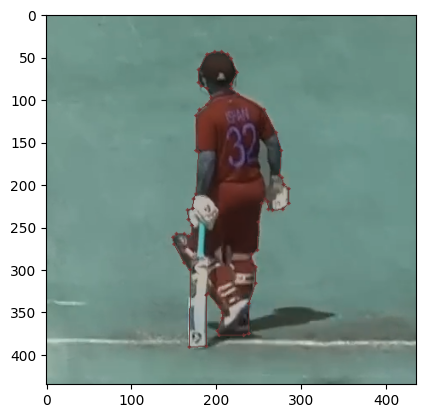

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
from src.data.visualize import drawSegments

txt_path = f"{export_path}/segmentations/000000.txt"
img_path = f"{export_path}/images/000000.png"
with open(txt_path) as handler:
  txt = handler.read()
img = cv.imread(img_path)
plt.imshow(drawSegments(img, txt))

In [8]:
# zip_path = shutil.make_archive("batsmen-semantic-segmentation", "zip", splited_path)

In [9]:
# from sagemaker.s3 import S3Uploader
# dst_ds_uri = "s3://third-umpire-decision-automation-osura/datasets"
# S3Uploader.upload(zip_path, dst_ds_uri)

# Augment data

In [10]:
splited_path = "../data/Batsmen-Semantic-Segmentation[splitted]"
augment_data_path = "../data/Batsmen-Semantic-Segmentation[augmented]"

In [11]:
emphasis_nums = [13,30,32,67,68,87,88,89,99,115,117,118,119,120,121,166,237,279,280,281,282,325,326,327,344] # images that has batsmen in the expected poses
emphasis = list(map(lambda num: str(num).rjust(6, "0")+".png", emphasis_nums))
total_raw_data_count = 298
emphasis_weight = 10
augment_rounds = 3
original_data_path = splited_path

In [12]:
# import sys, os
# parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# sys.path.append(parent_dir)

# import src.data.augment as augment

# augment.create_dataset(
#     original_data_path,
#     augment_data_path,
#     emphasis,
#     augment_rounds,
#     emphasis_weight,
# )